# Data Inspection

In [1]:
# Input files directories
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/optiver-trading-at-the-close/public_timeseries_testing_util.py
/kaggle/input/optiver-trading-at-the-close/train.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/sample_submission.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/revealed_targets.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/test.csv
/kaggle/input/optiver-trading-at-the-close/optiver2023/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/optiver-trading-at-the-close/optiver2023/__init__.py


In [2]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Import and show train data (train.csv)
train = pd.read_csv("/kaggle/input/optiver-trading-at-the-close/train.csv")
train

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [4]:
# Check data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [5]:
train[train['date_id'] == 477]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5193980,0,477,0,7485534.85,-1,1.000308,9375793.14,NaN,NaN,0.999958,9715.50,1.000133,30866.40,1.000000,-2.310276,26235,477_0_0
5193981,1,477,0,0.00,0,0.999203,2078442.76,NaN,NaN,0.999203,8020.80,1.000498,5019.50,1.000000,-12.850165,26235,477_0_1
5193982,2,477,0,3064803.52,1,1.000875,3905992.62,NaN,NaN,0.999949,777.04,1.001287,19452.00,1.000000,-0.439882,26235,477_0_2
5193983,3,477,0,2667930.04,-1,0.999889,30560587.60,NaN,NaN,0.999740,30321.00,1.000087,10110.50,1.000000,7.259846,26235,477_0_3
5193984,4,477,0,3338600.62,-1,1.000469,9342694.05,NaN,NaN,0.999961,1772.20,1.000695,31568.30,1.000000,4.780292,26235,477_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204975,195,477,540,2809393.38,-1,1.002359,35296955.75,1.001253,1.001253,1.002359,424927.60,1.002482,326361.57,1.002429,-3.190041,26289,477_540_195
5204976,196,477,540,1236161.74,-1,0.998663,8814158.85,0.996644,0.997401,0.998663,36276.52,0.999168,95031.58,0.998803,-6.200075,26289,477_540_196
5204977,197,477,540,509422.85,1,0.997623,10364257.03,0.998388,0.998388,0.997240,20846.00,0.997623,27527.28,0.997405,0.000000,26289,477_540_197
5204978,198,477,540,5724317.95,-1,0.999832,63738563.90,0.998511,0.998751,0.999712,538354.70,0.999952,967689.35,0.999797,1.300573,26289,477_540_198


In [6]:
# Check for null cells
train.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [7]:
print("No. of stocks in the trainset: ", len(train["stock_id"].unique()))

No. of stocks in the trainset:  200


In [8]:
print("No. of dates of data: ", len(train["date_id"].unique()))

No. of dates of data:  481


In [9]:
print("No. of time steps per day: ", len(train["seconds_in_bucket"].unique())-1)

# Data for the 540 seconds of the last 600 seconds are given.
# Given this, need to predict WAP at 600th seconds (i.e. at exactly the market close)

No. of time steps per day:  54


<Axes: title={'center': 'Stock 0 on Day 0 - How the order book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

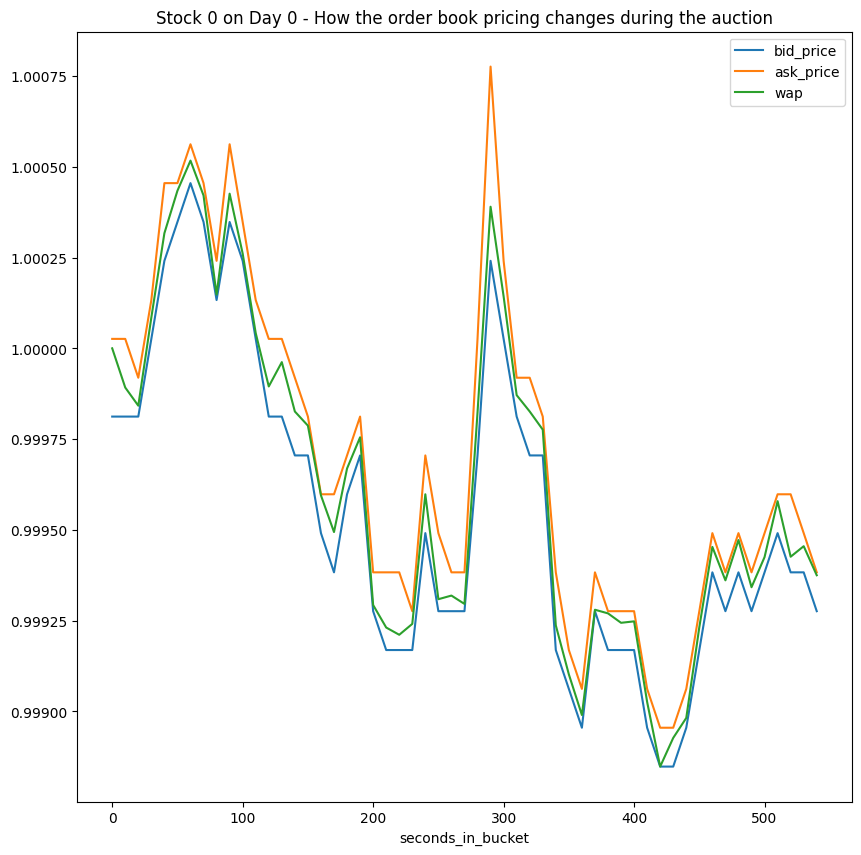

In [10]:
(
    train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','bid_price','ask_price', 'wap']]
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction', figsize=(10,10))
)

In [11]:
print(f"bid_price is always <= ask_price: {all(train['bid_price'].dropna() <= train['ask_price'].dropna())}")
print(f"wap is always >= bid_price: {all(train['bid_price'].dropna() <= train['wap'].dropna())}")
print(f"wap is always <= ask_price: {all(train['ask_price'].dropna() >= train['wap'].dropna())}")

# NOTE: No arbitrage apportunities

bid_price is always <= ask_price: True
wap is always >= bid_price: True
wap is always <= ask_price: True


<Axes: title={'center': 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

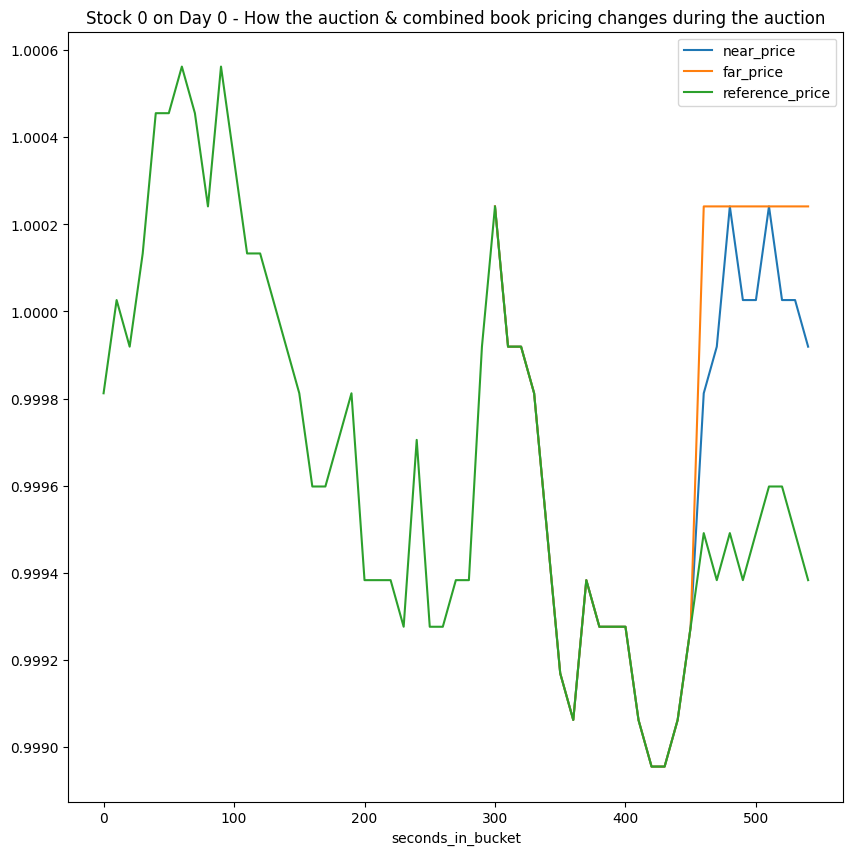

In [12]:
(
    train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','near_price','far_price','reference_price']]
    .set_index('seconds_in_bucket')
    .plot(title = 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction', figsize=(10,10))
)

# NOTE: far_price and reference_price only during the last 300s
# NOTE: other stocks/dates give significantly different charts

<Axes: title={'center': 'Stock 0 on Day 0 - How the auction sizing changes during the auction period'}, xlabel='seconds_in_bucket'>

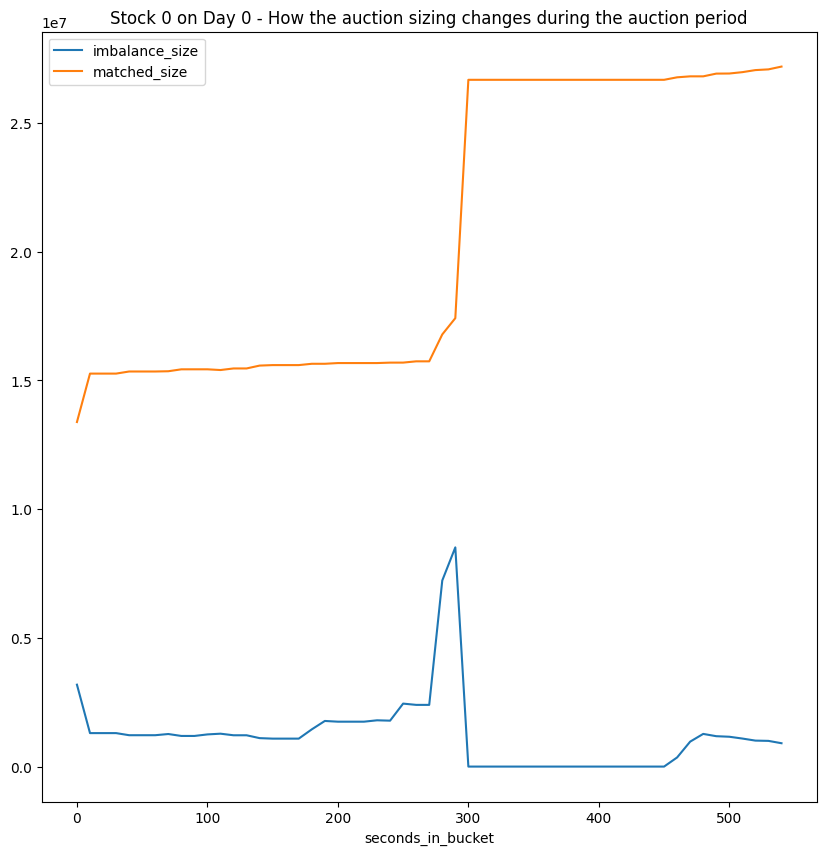

In [13]:
(
    train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','imbalance_size','matched_size']]
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0 on Day 0 - How the auction sizing changes during the auction period', figsize=(10,10))
)

# Data Analysis

Text(0.5, 1.0, 'Seasonality Effect of Matched Size (first 21 days of stock 0)')

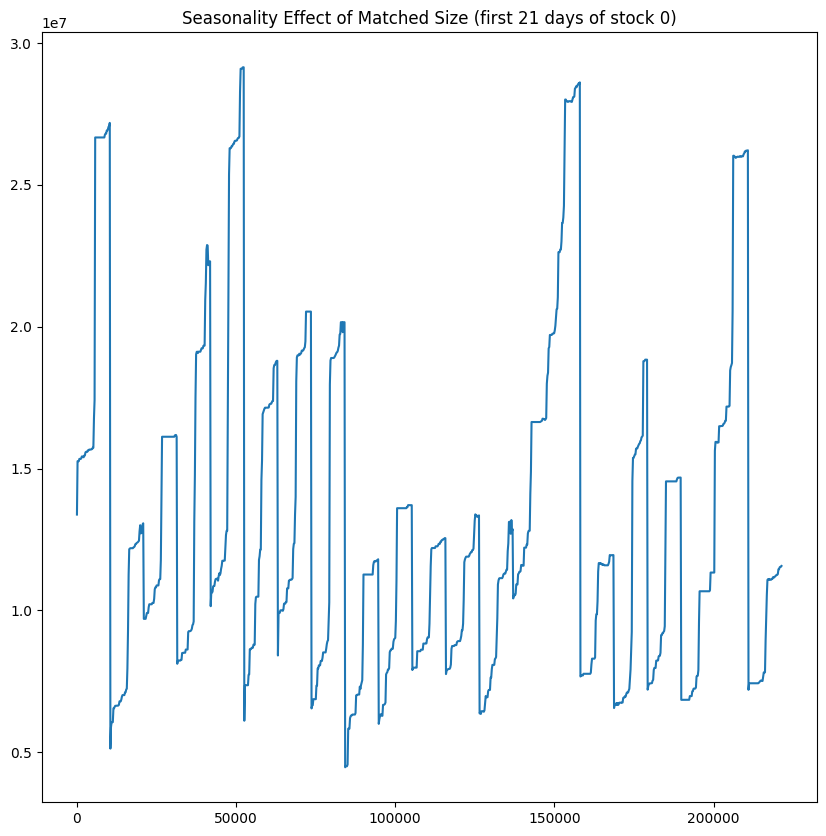

In [14]:
# NOTE: existence of seasonality (across all stocks) at ~300s, which is fundamentally sound (orders match during this period)

stock = train[train['stock_id'] == 0]
stock_0_21d = train[(train['stock_id'] == 0) & (train['date_id'] >= 0) & (train['date_id'] <= 20)]

plt.figure(figsize=(10,10))
plt.plot(stock_0_21d['matched_size'])
plt.title("Seasonality Effect of Matched Size (first 21 days of stock 0)")

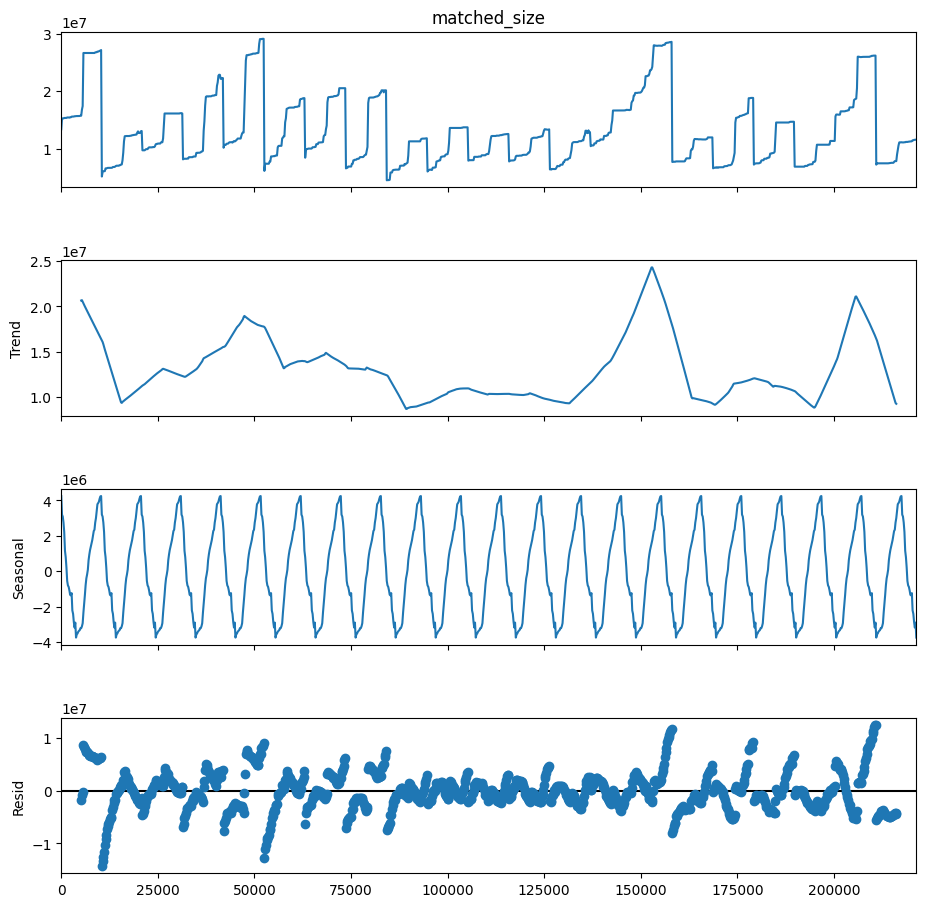

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decompososition of matched_size (54-period was selected to capture the daily seasonality)
seasonal_decompose(stock_0_21d['matched_size'], period=54).plot().set_size_inches(10, 10) 

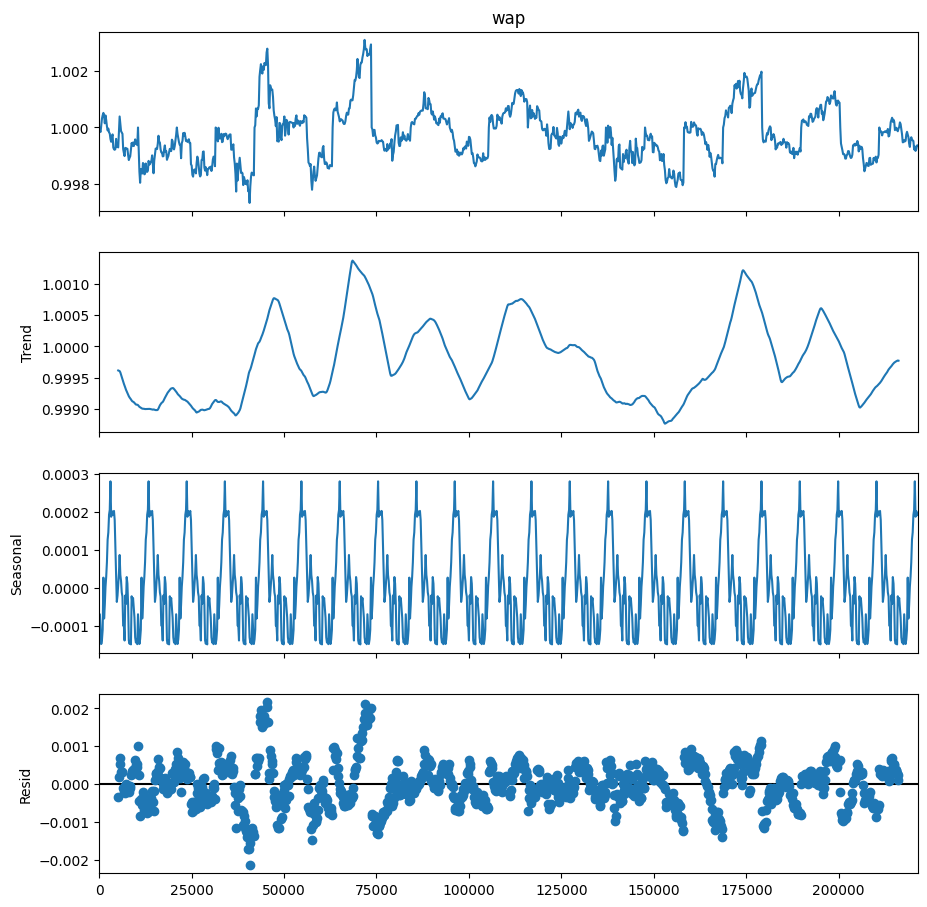

In [16]:
# Seasonal Decompososition of wap
seasonal_decompose(stock_0_21d['wap'], period=54).plot().set_size_inches(10, 10) 

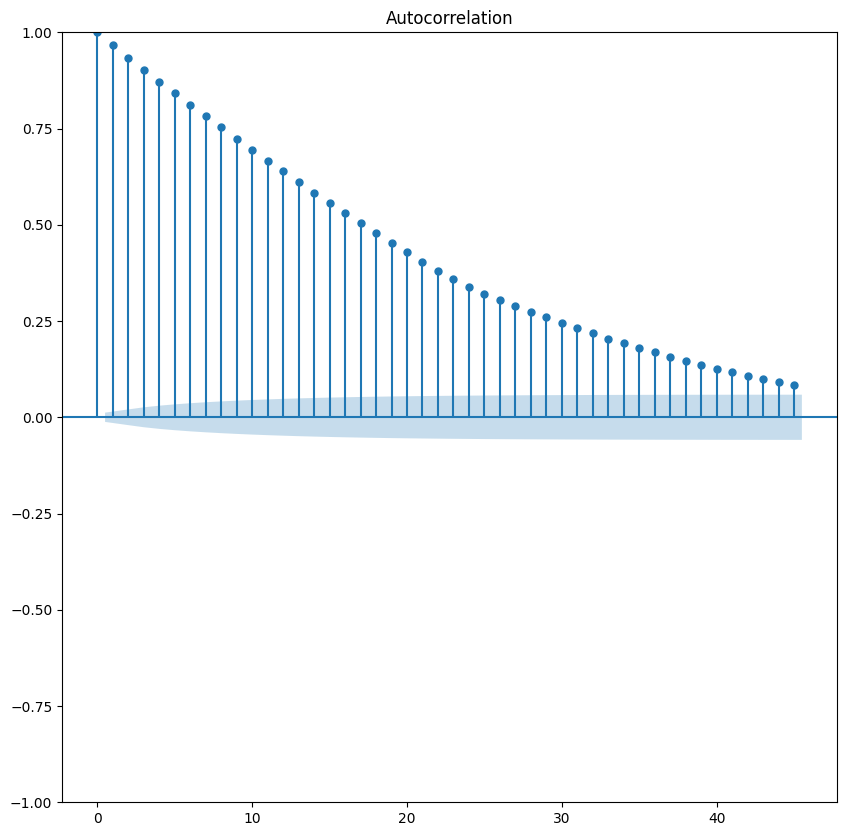

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock['wap']).set_size_inches(10, 10) 

# Blue Region: 95% Confidence Intervals
# The first lag (at 0) is always 1 because there is a perfect correlation of a times series with itself
# Significant autocorrelation that fades away

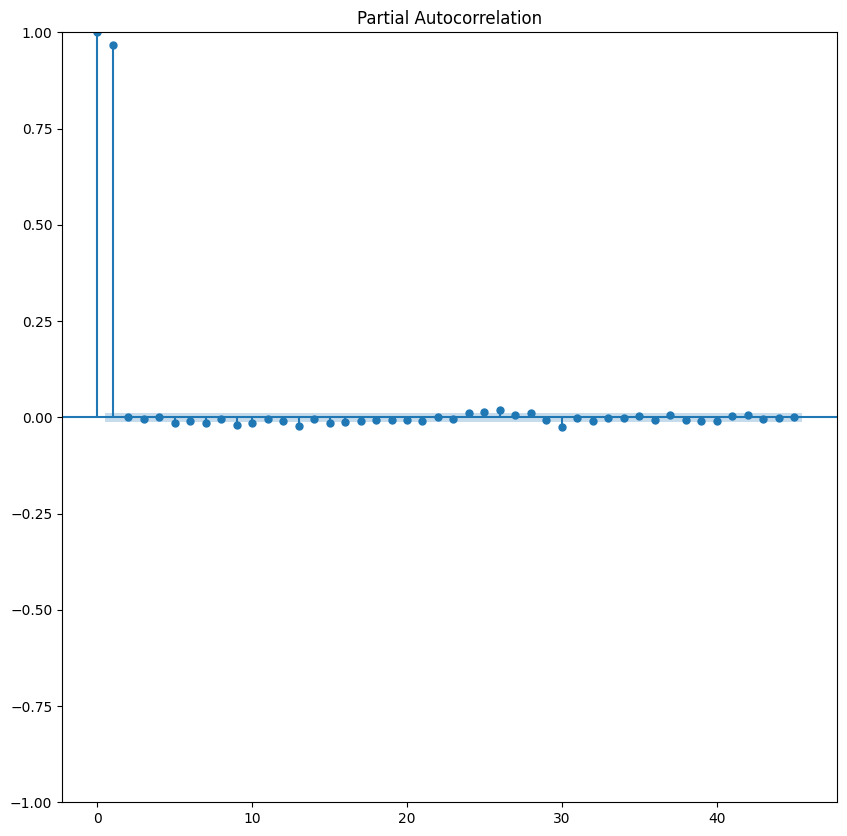

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stock['wap']).set_size_inches(10, 10)

# Strong positive autocorrelation with lag 1: a high value at t means that it is very likely to observe a high value at t+1

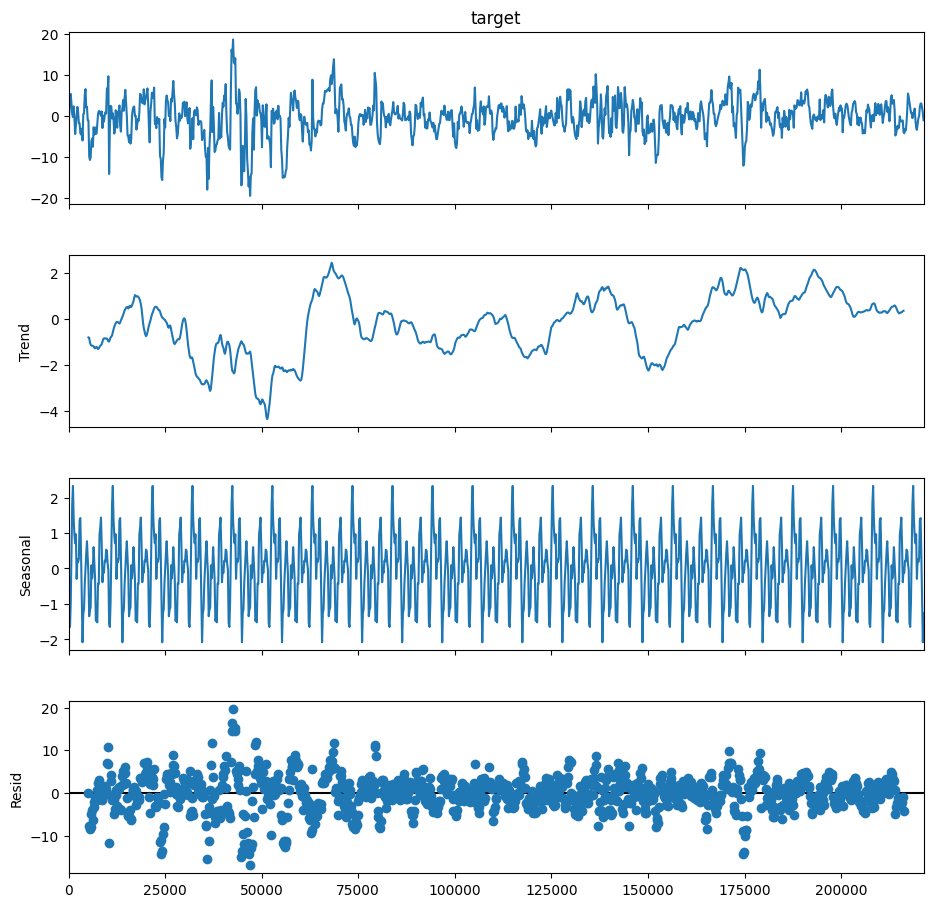

In [19]:
# Seasonal Decompososition of target
seasonal_decompose(stock_0_21d['target'], period=54).plot().set_size_inches(10, 10) 

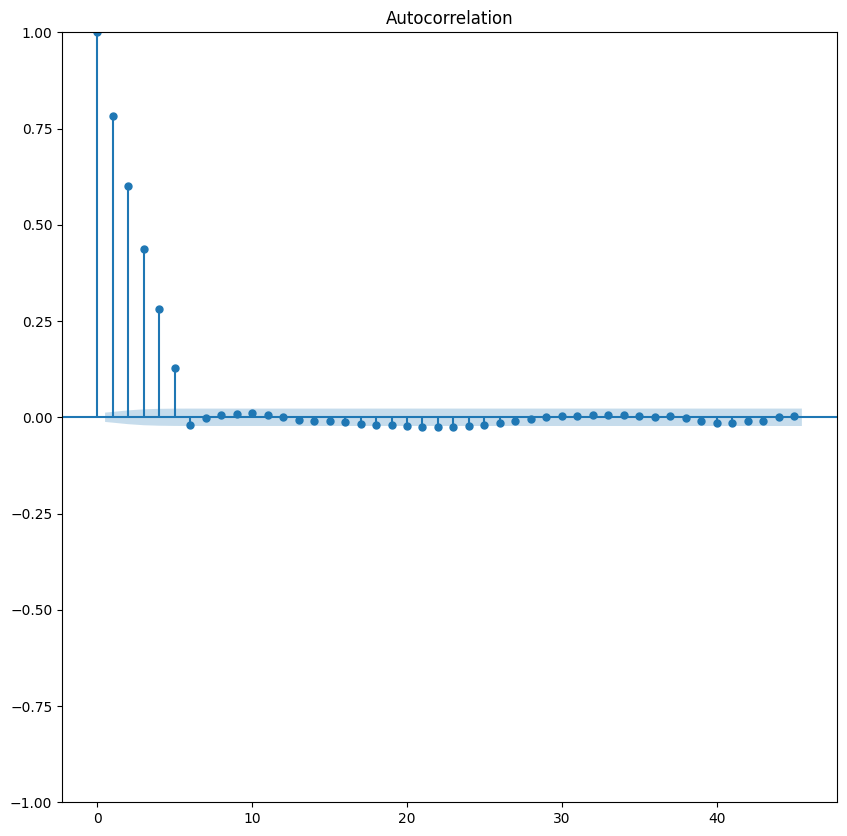

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock['target']).set_size_inches(10, 10) 

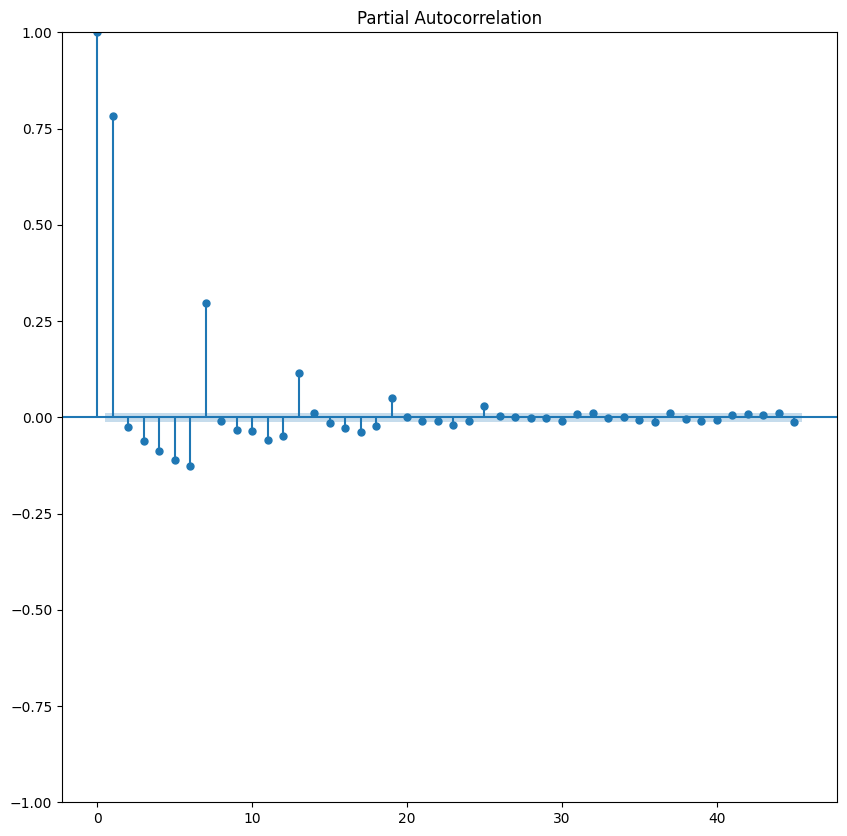

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stock['target']).set_size_inches(10, 10)

# Benchmark Models

**Naive Forecast (Benchmark #1)**

Strategy: We have no information and thus, cannot predict the markets (predicted value = 0)

In [22]:
train['naive_prediction'] = 0

**Imbalance Interest Forecast (Benchmark #2)**

Strategy: Price will move according to imbalance interest

Defition of Imbalance: "*An imbalance of orders is when a market exchange receives too many of one kind of order—buy, sell, limit—and not enough of the order's counterpoint.*" (Investopedia)

In [23]:
imbalance_mapping = {
    1: 0.1,
    0: 0,
    -1: -0.1
}

train['imbalance_prediction'] = train['imbalance_buy_sell_flag'].map(imbalance_mapping)

### Evaluation

**MAE - Mean Absolute Error**

In [24]:

# target is the prediction (if at t then target is at t+60) used to evaluate a model

# Calculate MAE for benchmark models
naive_mae = (train['naive_prediction'] - train['target']).abs().mean()
imbalance_mae = (train['imbalance_prediction'] - train['target']).abs().mean()

print('Naive Forecast: ', round(naive_mae, 4))
print('Imbalance Forecast: ', round(imbalance_mae, 4))
print('MAE Improvement (bps): ', round(naive_mae-imbalance_mae, 4))

Naive Forecast:  6.4078
Imbalance Forecast:  6.4071
MAE Improvement (bps):  0.0007


# Model Proposals

## ARIMA

In [25]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Suppress the specific ValueWarning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning, module="statsmodels.tsa.base.tsa_model")

# Suppress UserWarning
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels.tsa.statespace.sarimax")

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="statsmodels.tsa.base.tsa_model")

In [26]:
# K-Fold Cross Validation Methodb

"""
from statsmodels.tsa.arima.model import ARIMA as ARIMA
holdout_size = 7

arima_diff = []

for x in range(1):
    
    # Sample usage
    data = train[train['stock_id'] == x][['date_id', 'target']].reset_index(drop=True)

    # Extract unique date IDs and reverse
    unique_date_ids = data['date_id'].unique() #[::-1]

    # Split the reversed unique_date_ids into chunks based on holdout_size
    chunks = np.array_split(unique_date_ids, len(unique_date_ids) // holdout_size)

    print(f"Fitting StockID: {x}")
    for i, chunk in enumerate(chunks):
        val_date = chunk[-1]
        train_dates = chunk[:-1]

        val_data = data[data['date_id'] == val_date]
        train_data = data[data['date_id'].isin(train_dates)]

        val_data = val_data.drop(['date_id'], axis = 1)
        train_data = train_data.drop(['date_id'], axis = 1)

        model = ARIMA(train_data, order=(2, 1, 6))
        fitted = model.fit() 
        fc = fitted.forecast(len(val_data))
        preds = fc.values
        reals = val_data.values
        arima_diff.extend(preds - reals)
    
arima_mae = np.mean(np.abs(arima_diff))
arima_mae
"""

'\nfrom statsmodels.tsa.arima.model import ARIMA as ARIMA\nholdout_size = 7\n\narima_diff = []\n\nfor x in range(1):\n    \n    # Sample usage\n    data = train[train[\'stock_id\'] == x][[\'date_id\', \'target\']].reset_index(drop=True)\n\n    # Extract unique date IDs and reverse\n    unique_date_ids = data[\'date_id\'].unique() #[::-1]\n\n    # Split the reversed unique_date_ids into chunks based on holdout_size\n    chunks = np.array_split(unique_date_ids, len(unique_date_ids) // holdout_size)\n\n    print(f"Fitting StockID: {x}")\n    for i, chunk in enumerate(chunks):\n        val_date = chunk[-1]\n        train_dates = chunk[:-1]\n\n        val_data = data[data[\'date_id\'] == val_date]\n        train_data = data[data[\'date_id\'].isin(train_dates)]\n\n        val_data = val_data.drop([\'date_id\'], axis = 1)\n        train_data = train_data.drop([\'date_id\'], axis = 1)\n\n        model = ARIMA(train_data, order=(2, 1, 6))\n        fitted = model.fit() \n        fc = fitted.fore

In [27]:
"""
# Trailing Window

from pmdarima import auto_arima
window_size = 7

arima_error = []
exog_features = ['wap', 'imbalance_buy_sell_flag', 'imbalance_size', 'matched_size']

for stock_id in range(2,3):
    print(f"Testing stock {stock_id}")
    # Sample usage
    stock_data = train[train['stock_id'] == stock_id].reset_index(drop=True)


    # Extract unique date IDs
    unique_date_ids = stock_data['date_id'].unique()

    for first_date in range(len(unique_date_ids)-window_size):
        last_date = first_date + window_size
        print(f"    Testing window from {first_date} to {last_date}")
        val_date = unique_date_ids[last_date]
        train_dates = unique_date_ids[:last_date]

        val_data = stock_data[stock_data['date_id'] == val_date]
        train_data = stock_data[stock_data['date_id'].isin(train_dates)]

        model = auto_arima(
            train_data['target'],
            trace=False,
            error_action="ignore",
            suppress_warnings=True
        )
        preds = model.predict(n_periods=len(val_data))
        reals = val_data['target'].values
        arima_error.extend(preds - reals)
    
        print(f"Current MAE: {np.mean(np.abs(arima_error))}")"""

'\n# Trailing Window\n\nfrom pmdarima import auto_arima\nwindow_size = 7\n\narima_error = []\nexog_features = [\'wap\', \'imbalance_buy_sell_flag\', \'imbalance_size\', \'matched_size\']\n\nfor stock_id in range(2,3):\n    print(f"Testing stock {stock_id}")\n    # Sample usage\n    stock_data = train[train[\'stock_id\'] == stock_id].reset_index(drop=True)\n\n\n    # Extract unique date IDs\n    unique_date_ids = stock_data[\'date_id\'].unique()\n\n    for first_date in range(len(unique_date_ids)-window_size):\n        last_date = first_date + window_size\n        print(f"    Testing window from {first_date} to {last_date}")\n        val_date = unique_date_ids[last_date]\n        train_dates = unique_date_ids[:last_date]\n\n        val_data = stock_data[stock_data[\'date_id\'] == val_date]\n        train_data = stock_data[stock_data[\'date_id\'].isin(train_dates)]\n\n        model = auto_arima(\n            train_data[\'target\'],\n            trace=False,\n            error_action="ign

# SARIMA () Window_Size=7 - Version 2
​
A SARIMA model is very similar to the ARIMA model, with the addition of a seasonal component to account for recurring patterns or fluctuations in the data.
​
- **Seasonal Component (S)**: SARIMA models incorporate a seasonal component to account for recurring patterns or fluctuations in the data. This is often denoted as "S," and it represents the number of time periods in a season.
​
I (Patrick) reckon that the seasonal component can be interesting especially because there **might be** seasonal behaviorus with volatility and drift as shown by Thanos's notebook.

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [28]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
train

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,naive_prediction,imbalance_prediction
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0,0,0.1
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1,0,-0.1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2,0,-0.1
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3,0,-0.1
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4,0,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195,0,-0.1
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196,0,-0.1
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197,0,0.0
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198,0,0.1


In [30]:
exog = train[['seconds_in_bucket', 'imbalance_buy_sell_flag']]
exog

,seconds_in_bucket,imbalance_buy_sell_flag
0,0,1
1,0,-1
2,0,-1
3,0,-1
4,0,-1
...,...,...
5237975,540,-1
5237976,540,-1
5237977,540,0
5237978,540,1


In [31]:

# Trailing Window

from pmdarima import auto_arima
import matplotlib.pyplot as plt
window_size = 7

arima_error = []


for stock_id in range(2,3):
    print(f"Testing stock {stock_id}")
    # Sample usage
    stock_data = train[train['stock_id'] == stock_id].reset_index(drop=True)


    # Extract unique date IDs
    unique_date_ids = stock_data['date_id'].unique()

    for first_date in range(len(unique_date_ids)-window_size):
        last_date = first_date + window_size
        print(f"    Testing window from {first_date} to {last_date}")
        val_date = unique_date_ids[last_date]
        train_dates = unique_date_ids[:last_date]

        val_data = stock_data[stock_data['date_id'] == val_date]
        train_data = stock_data[stock_data['date_id'].isin(train_dates)]

        model = auto_arima(
            train_data['target'],
            trace=False,
            X=train_data[['seconds_in_bucket', 'imbalance_buy_sell_flag', 'imbalance_size']], #exogonous variables
            seasonal=True,          
            m=13, #300 Sec seasonality int((7*550)/300)=13
            
            error_action="ignore",
            suppress_warnings=True
        )
        preds = model.predict(n_periods=len(val_data))
        reals = val_data['target'].values
        plt.plot(preds)
        plt.plot(reals)
        plt.show()
        arima_error.extend(preds - reals)
    
        print(f"Current MAE: {np.mean(np.abs(arima_error))}")
        
# Print the summary of the best model
print(model.summary())

Testing stock 2
    Testing window from 0 to 7


ValueError: When an ARIMA is fit with an X array, it must also be provided one for predicting or updating observations.

m=7 Intraday seasonality within window (Does no improvement as model already recognises this) +-0.0001 change from Thanos Results

data['imbalance_buy_sell_size'] = data['imbalance_buy_sell_flag'] * data['imbalance_size'] Cant add exog

In [ ]:
print(f"Arima Trailing({window_size}) MAE: {np.mean(np.abs(arima_error))}")

In [ ]:
"""
Thanos Results
Testing stock 2
    Testing window from 0 to 7
Current MAE: 5.643273515131813
    Testing window from 1 to 8
Current MAE: 5.836961909124613
    Testing window from 2 to 9
Current MAE: 5.747348925643794
    Testing window from 3 to 10
Current MAE: 6.209304885211723
    Testing window from 4 to 11
Current MAE: 5.954757180697006
    Testing window from 5 to 12
Current MAE: 6.498064361501725
    Testing window from 6 to 13
Current MAE: 6.290241059515446
    Testing window from 7 to 14
Current MAE: 6.012149037712108
    Testing window from 8 to 15
Current MAE: 6.00069827169075
    Testing window from 9 to 16
Current MAE: 6.565301249846381
    Testing window from 10 to 17
Current MAE: 6.411292117618444
    Testing window from 11 to 18
Current MAE: 6.456921749986572
    Testing window from 12 to 19
Current MAE: 6.509602500171019
    Testing window from 13 to 20
Current MAE: 6.542021379909496
    Testing window from 14 to 21
Current MAE: 6.547747150179533
    Testing window from 15 to 22
Current MAE: 6.657883069881734
    Testing window from 16 to 23
Current MAE: 6.6382599419589265
    Testing window from 17 to 24
Current MAE: 6.53710892721728
    Testing window from 18 to 25
Current MAE: 6.427162987915655
    Testing window from 19 to 26
Current MAE: 6.287844695128552
    Testing window from 20 to 27
Current MAE: 6.234524166849635
    Testing window from 21 to 28
Current MAE: 6.31822104121725
    Testing window from 22 to 29
Current MAE: 6.23566497713319
    Testing window from 23 to 30
Current MAE: 6.392379567572544
    Testing window from 24 to 31
Current MAE: 6.356740482676007
    Testing window from 25 to 32
Current MAE: 6.410639656481312
    Testing window from 26 to 33
Current MAE: 7.211160710657341
    Testing window from 27 to 34
Current MAE: 7.289436884805242
    Testing window from 28 to 35
Current MAE: 7.228506755156636
    Testing window from 29 to 36
Current MAE: 7.1774192388712565
    Testing window from 30 to 37
Current MAE: 7.143640554403747
    Testing window from 31 to 38
Current MAE: 7.218449576625355
    Testing window from 32 to 39
Current MAE: 7.146744523180066
    Testing window from 33 to 40
Current MAE: 7.235415645505753
    Testing window from 34 to 41
Current MAE: 7.197461611079816
    Testing window from 35 to 42
Current MAE: 7.167608084521712
    Testing window from 36 to 43
Current MAE: 7.140162543834001
    Testing window from 37 to 44
Current MAE: 7.182386685532272
    Testing window from 38 to 45
Current MAE: 7.143677761075562
    Testing window from 39 to 46
Current MAE: 7.131060570254735
    Testing window from 40 to 47
Current MAE: 7.1257301195301
    Testing window from 41 to 48
Current MAE: 7.078779602130785
    Testing window from 42 to 49
Current MAE: 7.034052756397528
    Testing window from 43 to 50
Current MAE: 7.0117125635208986
    Testing window from 44 to 51
"""

## GARCH

In [ ]:
"""import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

window_size = 7
arima_error = []
exog_features = ['imbalance_buy_sell_flag', 'imbalance_size']

for stock_id in range(2, 3):
    print(f"Testing stock {stock_id}")
    # Sample usage
    stock_data = train[train['stock_id'] == stock_id].reset_index(drop=True)

    # Extract unique date IDs
    unique_date_ids = stock_data['date_id'].unique()

    for first_date in range(len(unique_date_ids) - window_size):
        last_date = first_date + window_size
        print(f"    Testing window from {first_date} to {last_date}")
        val_date = unique_date_ids[last_date]
        train_dates = unique_date_ids[:last_date]

        val_data = stock_data[stock_data['date_id'] == val_date]
        train_data = stock_data[stock_data['date_id'].isin(train_dates)]

        # Define SARIMA model
        model = SARIMAX(train_data['target'], exog=train_data[exog_features],
                        order=(p, d, q), seasonal_order=(P, D, Q, s))

        preds = model.predict(n_periods=len(val_data))
        reals = val_data['target'].values
        arima_error.extend(preds - reals)
    

        print(f"Current MAE: {np.mean(np.abs(arima_error))}")
"""

In [ ]:
"""
from arch import arch_model
holdout_size = 30

garch_diff = []

for x in range(1):
    
    # Sample usage
    data = train[train['stock_id'] == x][['date_id', 'target']].reset_index(drop=True)

    
#     Generate training and validation indices for time series cross-validation.

#     Parameters:
#     - data (pd.DataFrame): DataFrame containing 'date_id' column.
#     - holdout_size (int): Size of the validation set.

#     Yields:
#     - train_index, val_index (tuple): Indices for training and validation sets.
    

    # Extract unique date IDs and reverse their order
    unique_date_ids = data['date_id'].unique() #[::-1]

    # Split the reversed unique_date_ids into chunks based on holdout_size
    chunks = np.array_split(unique_date_ids, len(unique_date_ids) // holdout_size)

    print(f"Fitting StockID: {x}")
    for i, chunk in enumerate(chunks):
        val_date = chunk[-1]
        train_dates = chunk[:-1]

        # Determine the indices for the cells of validation date and training dates
        # I think this is wrong cause we try to predict the whole day
        val_data = data[data['date_id'] == val_date] #.index
        train_data = data[data['date_id'].isin(train_dates)] #.index

        val_data = val_data.drop(['date_id'], axis = 1).dropna()
        train_data = train_data.drop(['date_id'], axis = 1).dropna()

        model = arch_model(train_data, mean='Zero', vol='GARCH', p=2, q=6)
        fitted = model.fit() 
        fc = fitted.forecast(horizon=len(val_data))
        preds = fc.mean.values
        reals = val_data.values
        garch_diff.extend(preds - reals)
    
garch_mae = np.mean(np.abs(garch_diff))
garch_mae
"""